https://www.kaggle.com/datasets/abdullah0a/human-age-prediction-synthetic-dataset/code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('Train.csv')
data.head(10)

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79
5,Male,174.891617,79.671483,134/75,198.718529,26.047432,100.928108,1.435352,0.666739,27.908177,...,Diabetes,71.339373,Fair,Insomnia,3.138738,7.282163,4.413398,Undergraduate,Medium,29
6,Male,178.586966,86.521864,178/109,246.339736,27.128536,129.977078,0.577363,0.200000,63.363360,...,Diabetes,48.053091,Good,Insomnia,8.355000,5.552008,6.355807,High School,Low,76
7,Female,168.002914,66.524209,144/79,222.462440,23.569268,116.806072,1.618100,0.717328,39.530483,...,NaN,83.226875,Good,Excessive,2.583327,0.180754,5.926725,NaN,Medium,26
8,Female,164.546917,74.405356,152/119,204.235608,27.480504,137.022297,1.047384,0.505928,54.105122,...,Diabetes,64.702746,Fair,Insomnia,1.392434,9.945505,5.639334,High School,High,50
9,Female,164.839426,64.271711,153/109,268.598653,23.653623,130.056457,0.321093,0.200000,65.601092,...,Hypertension,57.824789,Poor,Excessive,7.273142,7.024841,4.313894,High School,High,77


# Data Preprocessing


## 1. Explore dataset

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Blood Pressure (s/d)         3000 non-null   object 
 4   Cholesterol Level (mg/dL)    3000 non-null   float64
 5   BMI                          3000 non-null   float64
 6   Blood Glucose Level (mg/dL)  3000 non-null   float64
 7   Bone Density (g/cm²)         3000 non-null   float64
 8   Vision Sharpness             3000 non-null   float64
 9   Hearing Ability (dB)         3000 non-null   float64
 10  Physical Activity Level      3000 non-null   object 
 11  Smoking Status               3000 non-null   object 
 12  Alcohol Consumption          1799 non-null   object 
 13  Diet              

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,168.590835,72.537260,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,63.868376,5.476507,5.028982,5.955785,53.485667
std,9.293006,13.190734,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,11.755738,2.584901,2.871408,3.474595,20.569690
min,141.130985,32.537672,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000
25%,161.629515,63.222773,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,55.647794,3.221745,2.607185,2.873285,36.000000
50%,168.215632,71.448651,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,64.014652,5.496618,5.095686,5.956789,53.000000
75%,175.522665,81.702801,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,72.087453,7.680320,7.476338,8.991349,72.000000
max,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000


In [4]:
categorical_variables = data.select_dtypes('object')
print(categorical_variables)
#Blood pressure should be a float, not object
numerical_variables = data.select_dtypes('float')
print(numerical_variables)

      Gender Blood Pressure (s/d) Physical Activity Level Smoking Status  \
0       Male              151/109                Moderate         Former   
1       Male              134/112                     Low        Current   
2     Female              160/101                Moderate          Never   
3     Female               133/94                Moderate          Never   
4     Female              170/106                     Low         Former   
...      ...                  ...                     ...            ...   
2995    Male               134/91                Moderate          Never   
2996    Male               110/78                     Low          Never   
2997    Male              159/116                Moderate        Current   
2998  Female               134/82                Moderate         Former   
2999    Male               167/91                    High          Never   

     Alcohol Consumption        Diet Chronic Diseases Medication Use  \
0              

- "Blood Pressure (s/d)" is supposed to be numerical variable but in the dataset, it is "object" which contains string info. Thus, we need to split them into 2 float numerical cols.

## 2. Detect & impute missing values

In [5]:

missing_values = data.isnull().sum()
print("Missing values in the train dataset:")
print(missing_values)

Missing values in the train dataset:
Gender                            0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
Age (years)                       0
dtype: int64


<Figure size 1000x600 with 0 Axes>

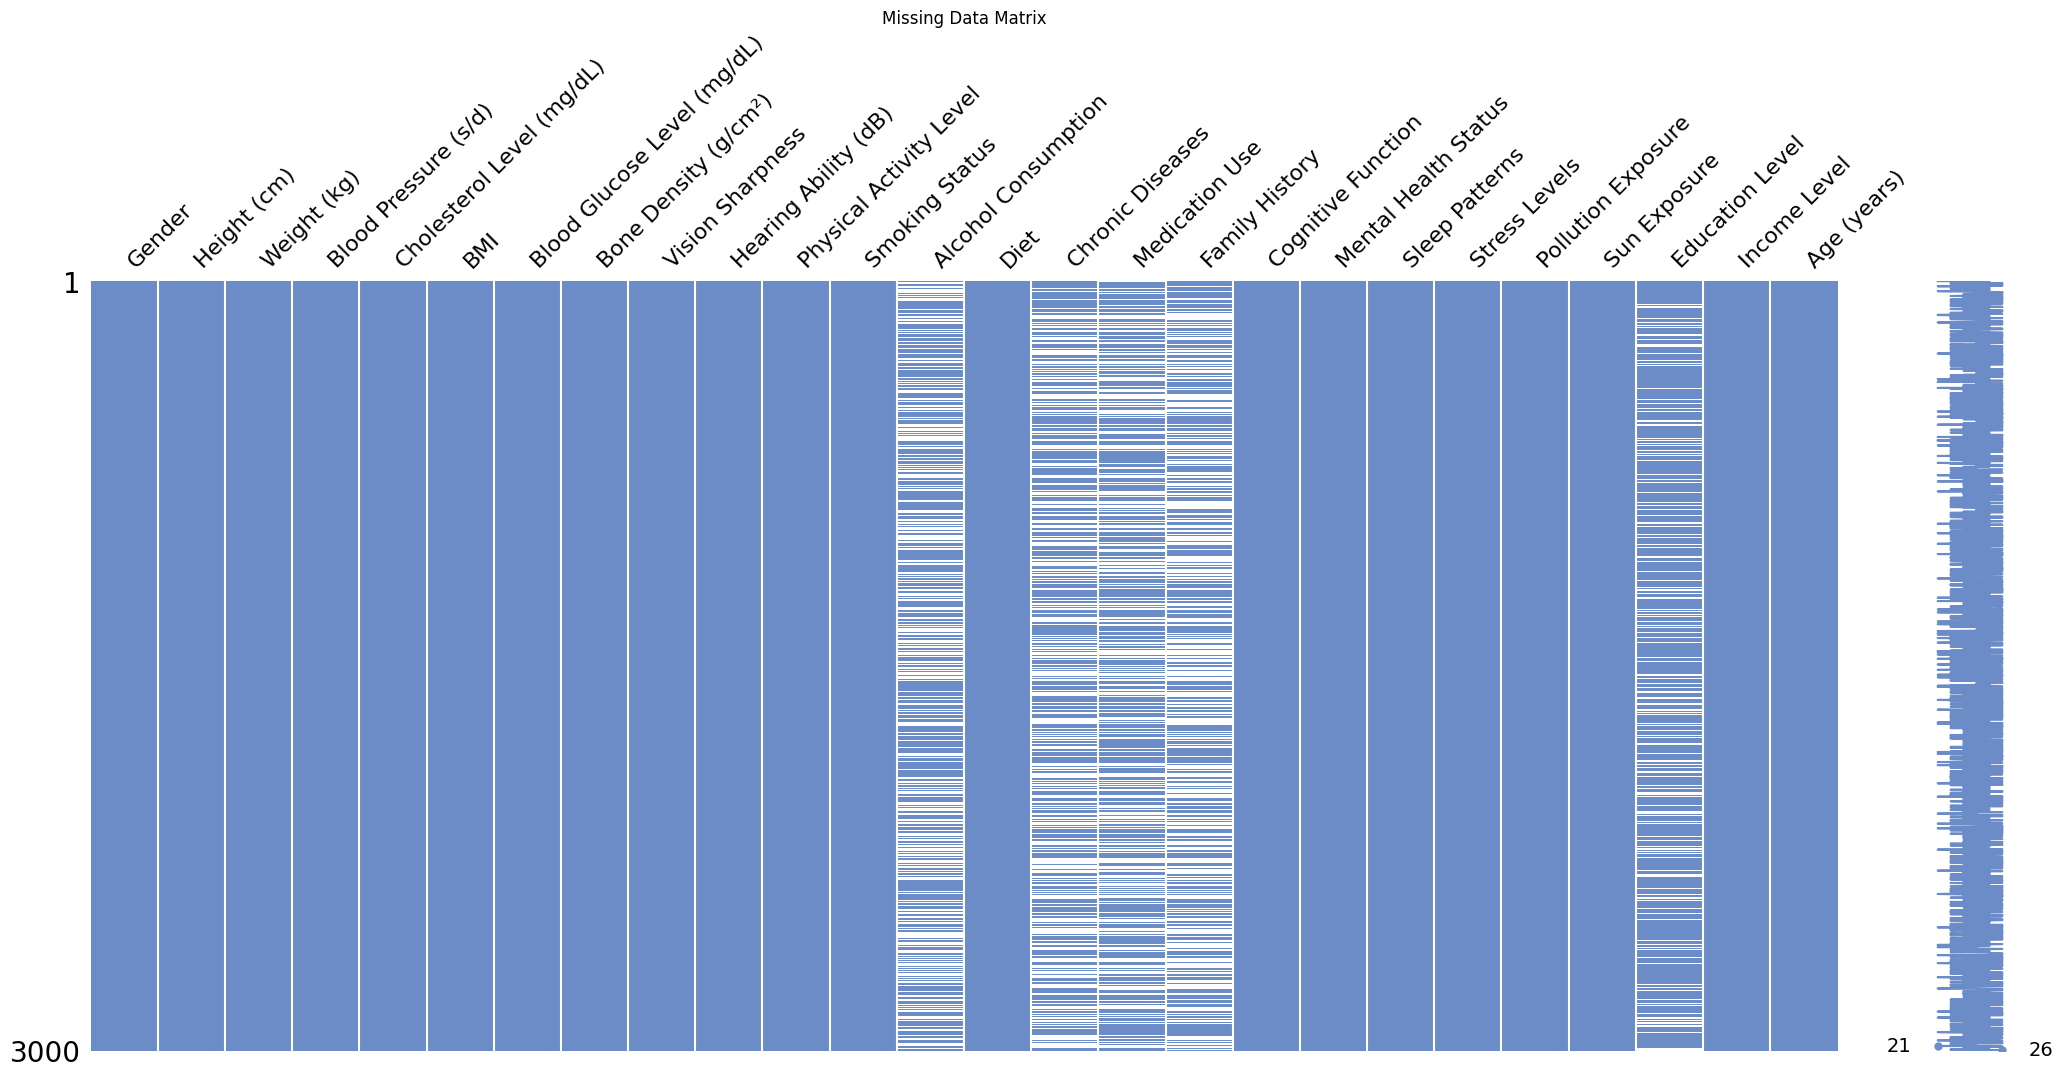

In [6]:
import missingno as msno
import matplotlib.pyplot as plt

# Set color for missing values visualization
plt.figure(figsize=(10, 6))
msno.matrix(data, color=(0.42, 0.55, 0.78))  # Change color to a shade of blue
plt.title('Missing Data Matrix')
plt.show()

In [7]:
#categories of alcohol consumption
data['Alcohol Consumption'].value_counts()

,count
Alcohol Consumption,
Occasional,1057
Frequent,742


In [8]:
data['Chronic Diseases'].unique()

array([nan, 'Hypertension', 'Diabetes', 'Heart Disease'], dtype=object)

In [9]:
#columns that have missing values
missvalcol = ['Alcohol Consumption', 'Chronic Diseases', 'Medication Use', 'Family History', 'Education Level']

# Display unique categories for each object column
for col in missvalcol:
    print(f"Column: {col}")
    print(data[col].unique())
    print("\n")

Column: Alcohol Consumption
[nan 'Occasional' 'Frequent']


Column: Chronic Diseases
[nan 'Hypertension' 'Diabetes' 'Heart Disease']


Column: Medication Use
[nan 'Regular' 'Occasional']


Column: Family History
[nan 'Heart Disease' 'Hypertension' 'Diabetes']


Column: Education Level
[nan 'Undergraduate' 'High School' 'Postgraduate']




In [10]:
#replace missing values with "None"
data[missvalcol] = data[missvalcol].fillna("None")

#verification
for col in missvalcol:
  print(f"{col}:", data[col].unique())


Alcohol Consumption: ['None' 'Occasional' 'Frequent']
Chronic Diseases: ['None' 'Hypertension' 'Diabetes' 'Heart Disease']
Medication Use: ['None' 'Regular' 'Occasional']
Family History: ['None' 'Heart Disease' 'Hypertension' 'Diabetes']
Education Level: ['None' 'Undergraduate' 'High School' 'Postgraduate']


## 3. Data Conversion

In [11]:
data[['Systolic', 'Diastolic']] = data['Blood Pressure (s/d)'].str.split('/', expand=True)
data['Systolic'] = data['Systolic'].astype(int)
data['Diastolic'] = data['Diastolic'].astype(int)
data_cleaned = data.drop(columns=["Blood Pressure (s/d)"])
data_cleaned.head(10)


,Gender,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,...,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),Systolic,Diastolic
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,Good,Insomnia,2.797064,5.142344,7.108975,None,Medium,89,151,109
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77,134,112
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,Poor,Insomnia,9.234637,8.500386,5.393408,None,Medium,70,160,101
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,Poor,Insomnia,4.693446,7.555511,2.745578,None,Low,52,133,94
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79,170,106
5,Male,174.891617,79.671483,198.718529,26.047432,100.928108,1.435352,0.666739,27.908177,Low,...,Fair,Insomnia,3.138738,7.282163,4.413398,Undergraduate,Medium,29,134,75
6,Male,178.586966,86.521864,246.339736,27.128536,129.977078,0.577363,0.200000,63.363360,Moderate,...,Good,Insomnia,8.355000,5.552008,6.355807,High School,Low,76,178,109
7,Female,168.002914,66.524209,222.462440,23.569268,116.806072,1.618100,0.717328,39.530483,Moderate,...,Good,Excessive,2.583327,0.180754,5.926725,None,Medium,26,144,79
8,Female,164.546917,74.405356,204.235608,27.480504,137.022297,1.047384,0.505928,54.105122,Moderate,...,Fair,Insomnia,1.392434,9.945505,5.639334,High School,High,50,152,119
9,Female,164.839426,64.271711,268.598653,23.653623,130.056457,0.321093,0.200000,65.601092,Moderate,...,Poor,Excessive,7.273142,7.024841,4.313894,High School,High,77,153,109


In [12]:
#Dummify categorical variables
data_cleaned = pd.get_dummies(data=data_cleaned, columns=['Gender','Physical Activity Level','Smoking Status','Alcohol Consumption','Diet','Chronic Diseases','Medication Use','Family History','Mental Health Status','Sleep Patterns','Education Level','Income Level'], drop_first=True)
data_cleaned.head(10)

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,...,Mental Health Status_Fair,Mental Health Status_Good,Mental Health Status_Poor,Sleep Patterns_Insomnia,Sleep Patterns_Normal,Education Level_None,Education Level_Postgraduate,Education Level_Undergraduate,Income Level_Low,Income Level_Medium
0,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,44.059172,2.797064,...,False,True,False,True,False,True,False,False,False,True
1,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,45.312298,9.339930,...,False,True,False,False,True,False,False,True,False,True
2,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,56.246991,9.234637,...,False,False,True,True,False,True,False,False,False,True
3,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,55.196092,4.693446,...,False,False,True,True,False,True,False,False,True,False
4,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,53.023379,4.038537,...,False,True,False,False,True,False,False,True,False,False
5,174.891617,79.671483,198.718529,26.047432,100.928108,1.435352,0.666739,27.908177,71.339373,3.138738,...,True,False,False,True,False,False,False,True,False,True
6,178.586966,86.521864,246.339736,27.128536,129.977078,0.577363,0.200000,63.363360,48.053091,8.355000,...,False,True,False,True,False,False,False,False,True,False
7,168.002914,66.524209,222.462440,23.569268,116.806072,1.618100,0.717328,39.530483,83.226875,2.583327,...,False,True,False,False,False,True,False,False,False,True
8,164.546917,74.405356,204.235608,27.480504,137.022297,1.047384,0.505928,54.105122,64.702746,1.392434,...,True,False,False,True,False,False,False,False,False,False
9,164.839426,64.271711,268.598653,23.653623,130.056457,0.321093,0.200000,65.601092,57.824789,7.273142,...,False,False,True,False,False,False,False,False,False,False


##4. Mulicollinearity of numerical Varaibles

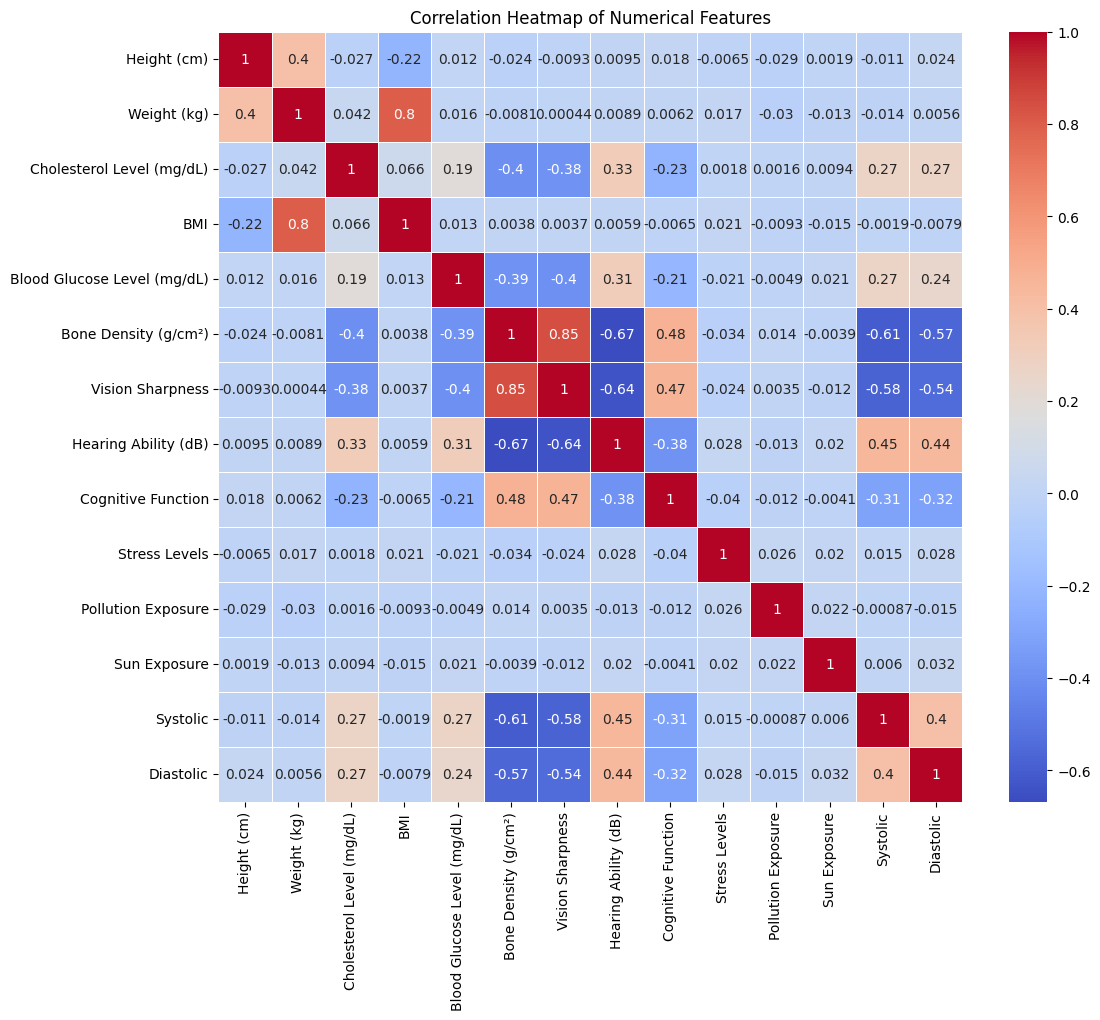

In [13]:
numerical_features = data_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Age (years)'])
correlation_matrix = numerical_features.corr()
plt.figure(figsize =(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
print(vif_data)

                        Feature         VIF
0                   Height (cm)  606.609744
1                   Weight (kg)  250.671063
2                           BMI  230.516559
3                     Diastolic  141.499350
4                      Systolic  138.208360
5     Cholesterol Level (mg/dL)  111.673533
6   Blood Glucose Level (mg/dL)   59.543749
7            Cognitive Function   40.543283
8          Bone Density (g/cm²)   24.083763
9              Vision Sharpness   23.747346
10         Hearing Ability (dB)   22.408642
11                Stress Levels    5.516319
12           Pollution Exposure    4.086307
13                 Sun Exposure    3.951976


- We found that "Height (cm)", "Weight (kg)", "BMI" are highly correlated because "BMI" is calculated by "Height (cm)" and "Weight (kg)". Thus, we drop "Height (cm)" and "Weight (kg)".

In [15]:
# drop "Height (cm)", "Weight (kg)"
data_cleaned  = data_cleaned.drop(columns=["Height (cm)", "Weight (kg)"])
data_cleaned.head(10)

,Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,...,Mental Health Status_Fair,Mental Health Status_Good,Mental Health Status_Poor,Sleep Patterns_Insomnia,Sleep Patterns_Normal,Education Level_None,Education Level_Postgraduate,Education Level_Undergraduate,Income Level_Low,Income Level_Medium
0,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,44.059172,2.797064,5.142344,7.108975,...,False,True,False,True,False,True,False,False,False,True
1,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,45.312298,9.339930,7.272720,3.918489,...,False,True,False,False,True,False,False,True,False,True
2,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,56.246991,9.234637,8.500386,5.393408,...,False,False,True,True,False,True,False,False,False,True
3,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,55.196092,4.693446,7.555511,2.745578,...,False,False,True,True,False,True,False,False,True,False
4,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,53.023379,4.038537,9.429097,3.878435,...,False,True,False,False,True,False,False,True,False,False
5,198.718529,26.047432,100.928108,1.435352,0.666739,27.908177,71.339373,3.138738,7.282163,4.413398,...,True,False,False,True,False,False,False,True,False,True
6,246.339736,27.128536,129.977078,0.577363,0.200000,63.363360,48.053091,8.355000,5.552008,6.355807,...,False,True,False,True,False,False,False,False,True,False
7,222.462440,23.569268,116.806072,1.618100,0.717328,39.530483,83.226875,2.583327,0.180754,5.926725,...,False,True,False,False,False,True,False,False,False,True
8,204.235608,27.480504,137.022297,1.047384,0.505928,54.105122,64.702746,1.392434,9.945505,5.639334,...,True,False,False,True,False,False,False,False,False,False
9,268.598653,23.653623,130.056457,0.321093,0.200000,65.601092,57.824789,7.273142,7.024841,4.313894,...,False,False,True,False,False,False,False,False,False,False


## 5. Outliers Detection & Removal

Number of outliers in each column:
                        Feature  Number of Outliers
0     Cholesterol Level (mg/dL)                  19
1                           BMI                  16
2   Blood Glucose Level (mg/dL)                  13
3          Bone Density (g/cm²)                   0
4              Vision Sharpness                   0
5          Hearing Ability (dB)                   9
6            Cognitive Function                  11
7                 Stress Levels                   0
8            Pollution Exposure                   0
9                  Sun Exposure                   0
10                  Age (years)                   0
11                     Systolic                   4
12                    Diastolic                   6


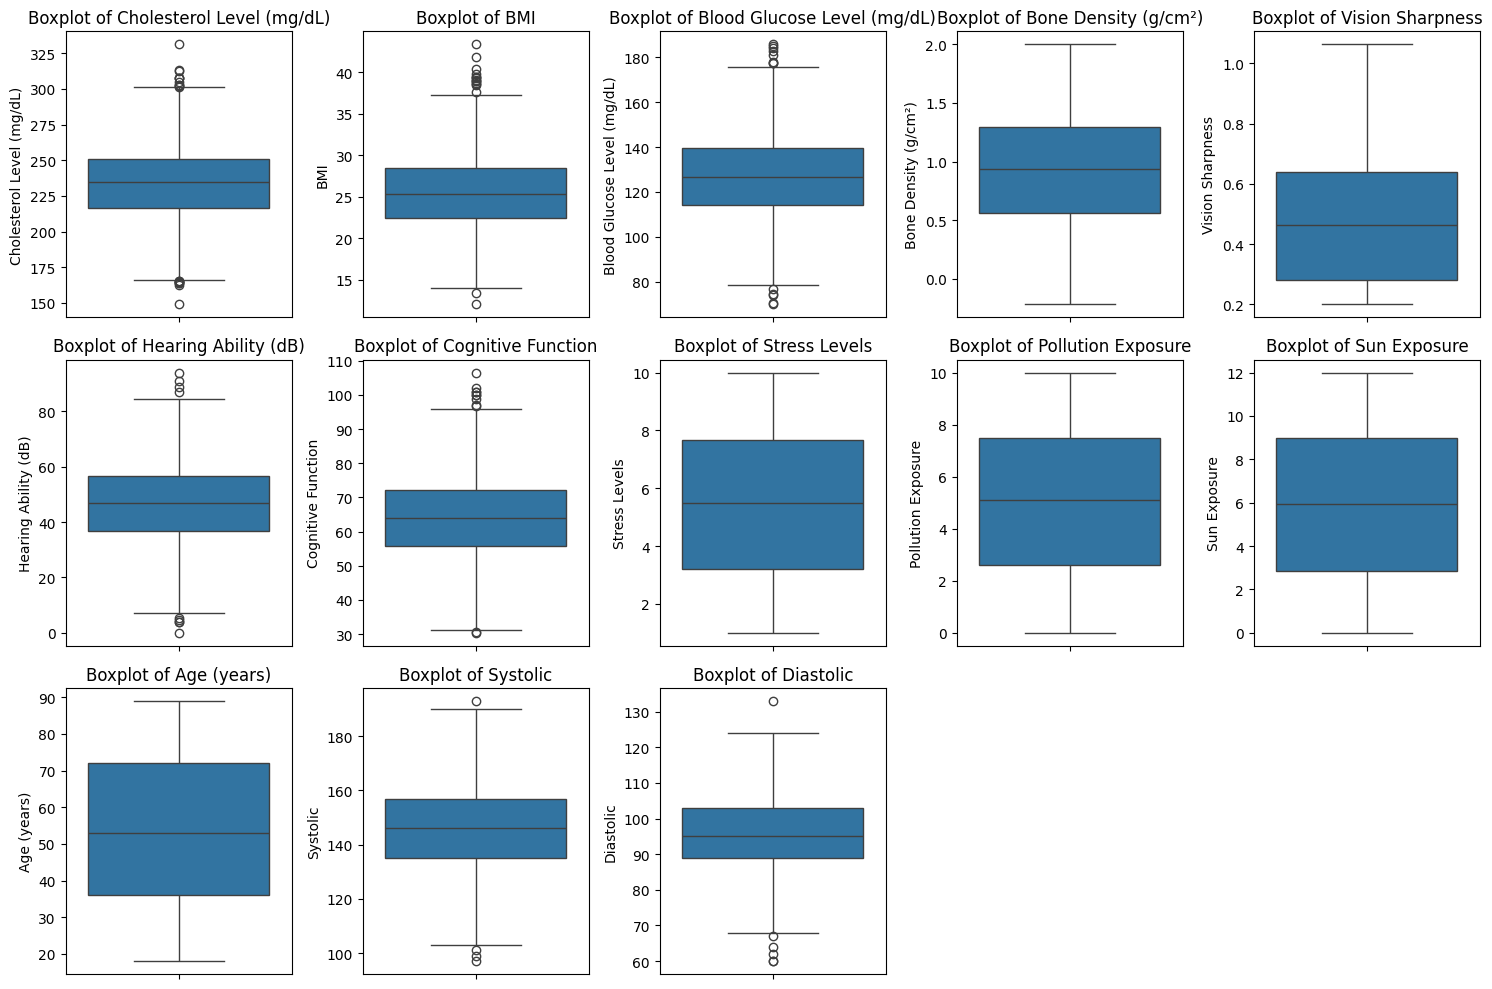

In [16]:
outliers = {}

# Get the numerical columns that are still in the DataFrame
numerical_columns_in_df = data_cleaned.select_dtypes(include=['number']).columns

for column in numerical_columns_in_df:  # Iterate over the existing numerical columns
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = data_cleaned[(data_cleaned[column] < lower_bound) | (data_cleaned[column] > upper_bound)].index
    outliers[column] = len(outlier_indices)

print("Number of outliers in each column:")
outliers_df = pd.DataFrame(list(outliers.items()), columns=['Feature', 'Number of Outliers'])
print(outliers_df)

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns_in_df, 1):  # Iterate over existing columns for plotting
    plt.subplot(3, 5, i)
    sns.boxplot(y=data_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

Outliers detected for the following features (more than 10 outliers): Cholesterol level, BMI, Blood Glucose Level, Cognitive function. To investigate further, we will look at scatterplots

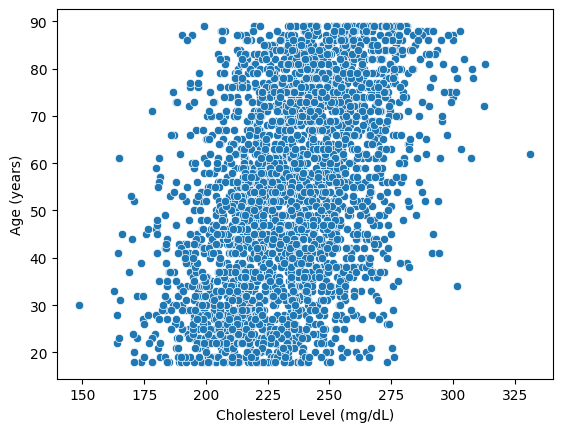

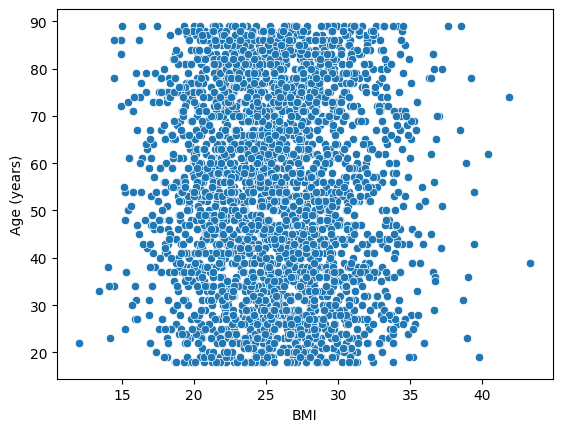

In [17]:
sns.scatterplot(x=data_cleaned['Cholesterol Level (mg/dL)'], y=data_cleaned['Age (years)'])
plt.show()

sns.scatterplot(x=data_cleaned['BMI'], y=data_cleaned['Age (years)'])
plt.show()


We only have 19 outliers for Cholesterol out of 3000 observations so it would not make a big difference in the analysis. This same logic applies to the other variables because they contain even fewer outliers.

## 6. Skewness Detection

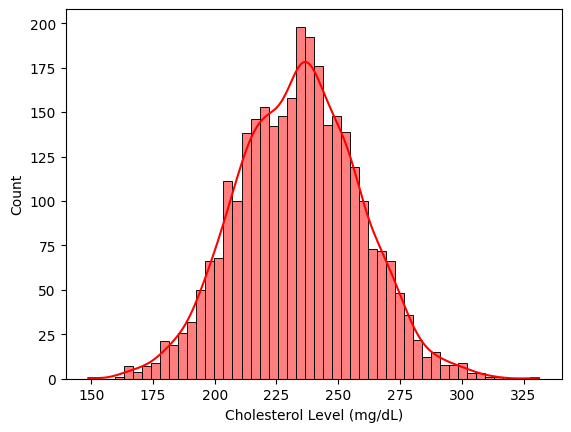

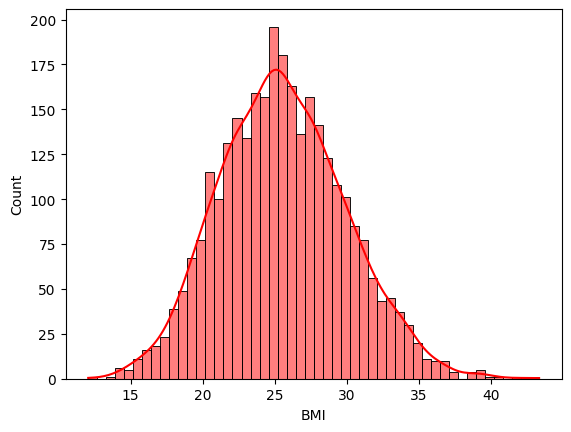

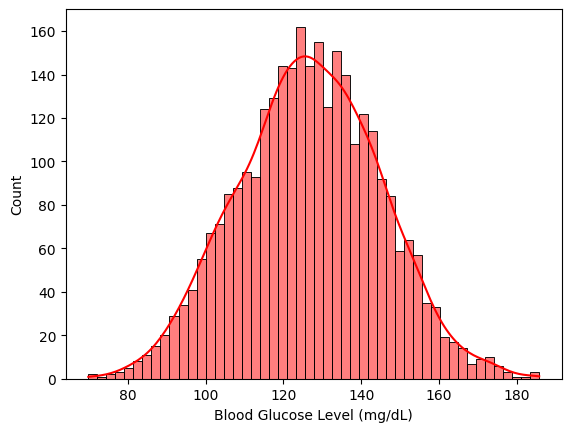

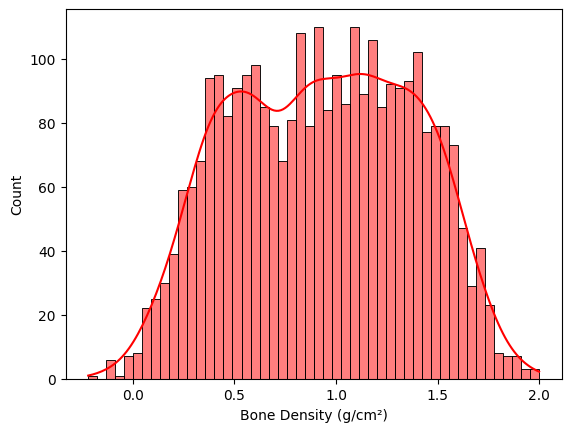

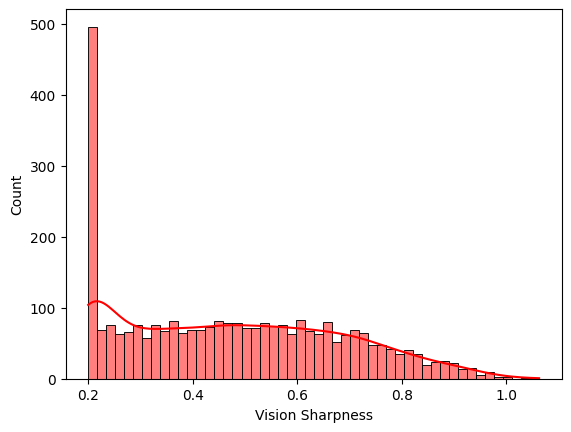

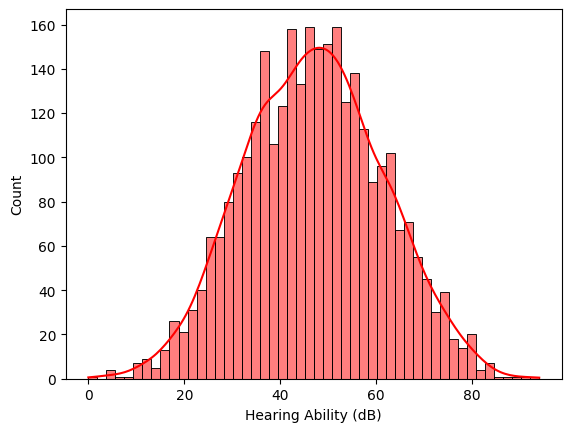

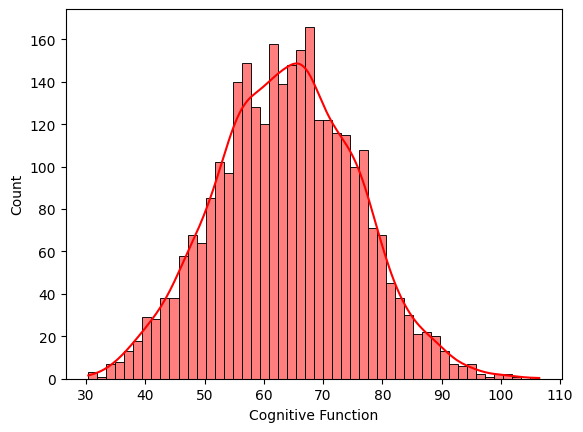

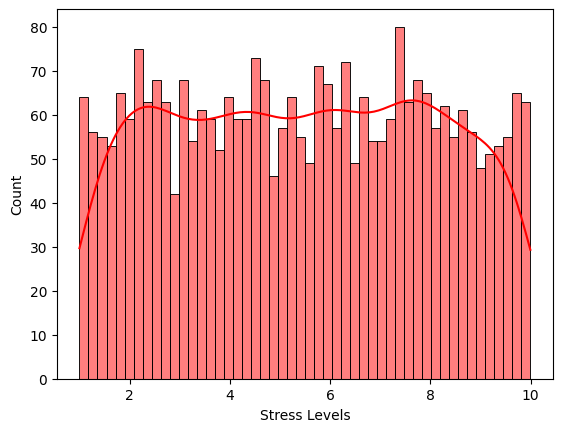

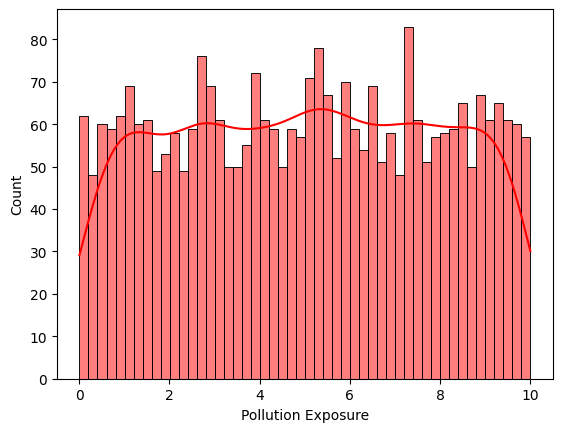

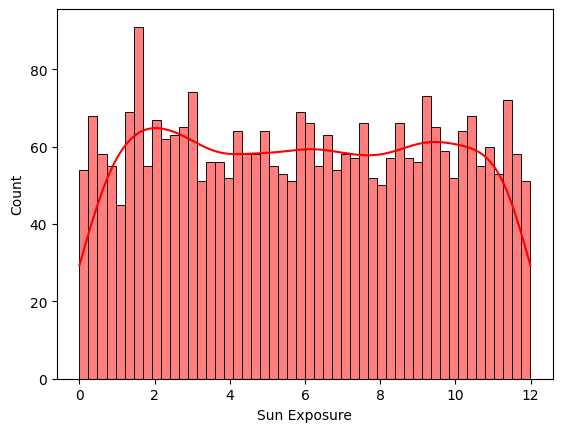

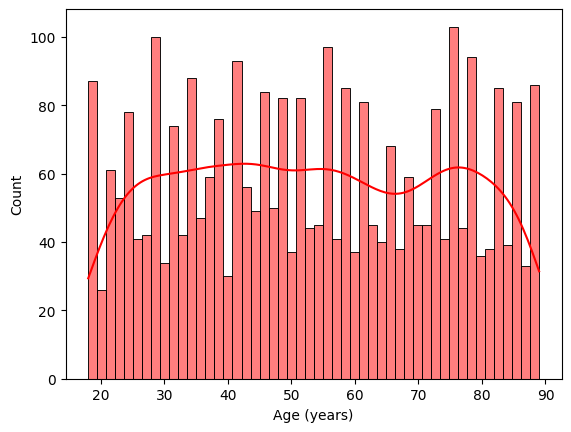

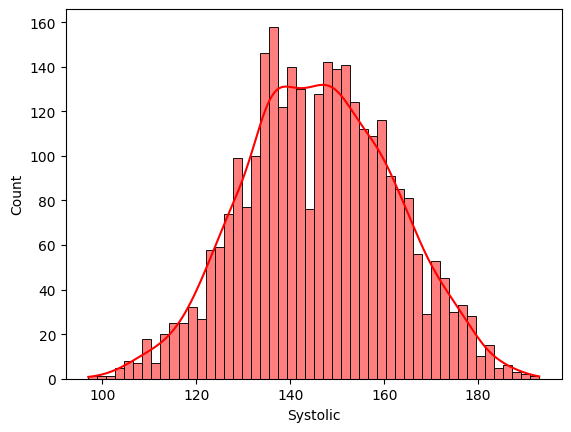

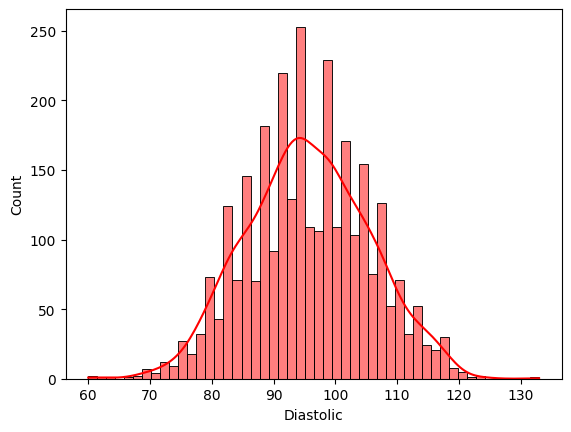

In [18]:
# Update numerical_variables to only include columns present in data_cleaned
numerical_variables = data_cleaned.select_dtypes(include=['number']).columns

for col in numerical_variables:
    sns.histplot(x = data_cleaned[col], bins = 50, kde =True, color='red')
    plt.show()

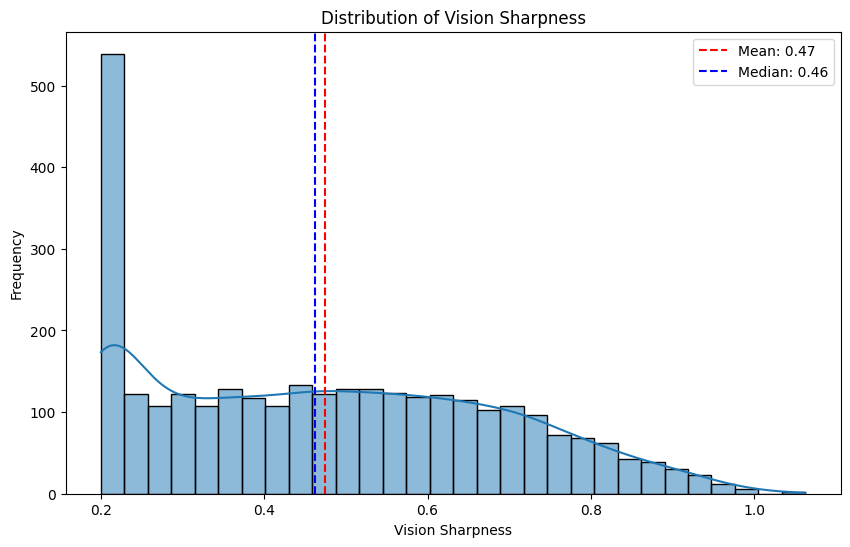

In [19]:
# We found only vision sharpness has skewness, let's take a closer look at it
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Vision Sharpness'], kde=True, bins=30)
plt.title('Distribution of Vision Sharpness')
plt.xlabel('Vision Sharpness')
plt.ylabel('Frequency')
plt.axvline(data_cleaned['Vision Sharpness'].mean(), color='red', linestyle='--', label=f"Mean: {data_cleaned['Vision Sharpness'].mean():.2f}")
plt.axvline(data_cleaned['Vision Sharpness'].median(), color='blue', linestyle='--', label=f"Median: {data_cleaned['Vision Sharpness'].median():.2f}")
plt.legend()
plt.show()

## 7. Countplots for Categorical Variables

After checking the mean and median of "Vision Sharpness", we found that the difference is negligable.

In [20]:
for column in data_cleaned.select_dtypes(include=['object']).columns:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=column, data=data_cleaned)
  plt.title(f'Countplot of {column}')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.show()

## 8. Feature Selection


### 8.1 RFECV

In [21]:
#Standardization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data_cleaned.drop(columns=['Age (years)'])
y = data_cleaned['Age (years)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

from sklearn.feature_selection import RFECV
rfe = RFECV(lm, min_features_to_select=1, cv=5, scoring='neg_mean_squared_error')
model = rfe.fit(scaled_X_train, y_train)
model.n_features_ # check which features got selected
rfe_rank_df = pd.DataFrame(list(zip(X_train.columns,model.ranking_)), columns = ['predictor','ranking'])
rfe_rank_df = rfe_rank_df.sort_values(by='ranking', ascending=True)
print(rfe_rank_df)

                           predictor  ranking
0          Cholesterol Level (mg/dL)        1
2        Blood Glucose Level (mg/dL)        1
3               Bone Density (g/cm²)        1
4                   Vision Sharpness        1
5               Hearing Ability (dB)        1
6                 Cognitive Function        1
11                         Diastolic        1
10                          Systolic        1
34             Sleep Patterns_Normal        2
16              Smoking Status_Never        3
19                     Diet_High-fat        4
28       Family History_Hypertension        5
37     Education Level_Undergraduate        6
14  Physical Activity Level_Moderate        7
13       Physical Activity Level_Low        8
20                     Diet_Low-carb        9
24             Chronic Diseases_None       10
12                       Gender_Male       11
15             Smoking Status_Former       12
9                       Sun Exposure       13
31         Mental Health Status_Go

Based on RFECV, the most important features are the Cholesterol level, the blood glucose level, bone density, vision sharpness, hearing ability, cognitive function, and the diastolic/systolic values.

### 8.2 LASSO for feature selection

In [23]:
from sklearn.linear_model import Lasso
import pandas as pd

# Assuming scaled_X_train and y_train are already defined
ls = Lasso(alpha=0.01)
model = ls.fit(scaled_X_train, y_train)

# Create a DataFrame with predictors and their coefficients
coef_df = pd.DataFrame(list(zip(X_train.columns, model.coef_)), columns=['predictor', 'coefficient'])

# Rank by absolute value of coefficients in descending order
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False).drop(columns=['abs_coefficient']).reset_index(drop=True)

# Display the ranked DataFrame
print(coef_df)

                           predictor  coefficient
0               Bone Density (g/cm²)   -10.238197
1                   Vision Sharpness    -6.072823
2               Hearing Ability (dB)     1.861680
3                           Systolic     1.547959
4                          Diastolic     1.528322
5                 Cognitive Function    -0.769938
6          Cholesterol Level (mg/dL)     0.730191
7        Blood Glucose Level (mg/dL)     0.477771
8              Sleep Patterns_Normal    -0.318482
9               Smoking Status_Never    -0.298626
10       Family History_Hypertension    -0.225191
11  Physical Activity Level_Moderate     0.210288
12                     Diet_High-fat    -0.198955
13                       Gender_Male     0.146217
14                     Diet_Low-carb    -0.140772
15       Physical Activity Level_Low     0.128264
16             Chronic Diseases_None    -0.122022
17                      Sun Exposure    -0.117585
18                  Income Level_Low    -0.099094


### 8.3 Random Forest for feature selection

In [24]:
from sklearn.ensemble import RandomForestClassifier
randomforest= RandomForestClassifier(random_state=0)
model = randomforest.fit(scaled_X_train,y_train)
feature_importance_df = pd.DataFrame(list(zip(X_train.columns,model.feature_importances_)), columns = ['predictor','feature importance'])
feature_importance_df = feature_importance_df.sort_values(by='feature importance', ascending=False)
print(feature_importance_df)

                           predictor  feature importance
3               Bone Density (g/cm²)            0.079915
4                   Vision Sharpness            0.064513
5               Hearing Ability (dB)            0.058389
6                 Cognitive Function            0.054621
10                          Systolic            0.054044
2        Blood Glucose Level (mg/dL)            0.053866
0          Cholesterol Level (mg/dL)            0.053863
8                 Pollution Exposure            0.053563
9                       Sun Exposure            0.053126
1                                BMI            0.052952
7                      Stress Levels            0.052679
11                         Diastolic            0.048641
12                       Gender_Male            0.013859
14  Physical Activity Level_Moderate            0.013782
17          Alcohol Consumption_None            0.013411
26            Medication Use_Regular            0.012814
34             Sleep Patterns_N

# Modelling

## Baseline Model: Linear Regression

In [25]:
#Build Linear Regression with selected features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_1 = data_cleaned[['Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)', 'Bone Density (g/cm²)', 'Vision Sharpness', 'Hearing Ability (dB)', 'Cognitive Function', 'Systolic', 'Diastolic']]
y_1 = data_cleaned['Age (years)']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.5, random_state=42)
#standardize
scaler = StandardScaler()
scaled_X_train_1 = scaler.fit_transform(X_train_1)
scaled_X_test_1 = scaler.transform(X_test_1)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(scaled_X_train_1, y_train_1)

#Generate ouput predictions
y_pred = model.predict(scaled_X_test_1)
feature_names = X_1.columns
coefficients = model.coef_

# Print the coefficients for each feature
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

#evaluate model performance
mse = mean_squared_error(y_test_1, y_pred)
r2 = r2_score(y_test_1, y_pred)

print("RMSE:", np.sqrt(mse))
print("R-squared:", r2)



Cholesterol Level (mg/dL): 0.7077851680237479
Blood Glucose Level (mg/dL): 0.4899043422778835
Bone Density (g/cm²): -10.252042210702754
Vision Sharpness: -6.130336725893772
Hearing Ability (dB): 1.866396913863161
Cognitive Function: -0.7706903040650961
Systolic: 1.5184265773824444
Diastolic: 1.5232687035517045
RMSE: 5.153114463241873
R-squared: 0.9369142938047934


## Try different other models

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Define a function to evaluate and print the R² and RMSE scores
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2, rmse

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.5, random_state=42)

# List of regression models to evaluate
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "XGBoost Regressor": XGBRegressor(),
    "LightGBM Regressor": LGBMRegressor(verbose=-1)
}

# Evaluate each model and print the results
for name, model in models.items():
    r2, rmse = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{name} - R²: {r2:.4f}, RMSE: {rmse:.4f}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Decision Tree - R²: 0.8509, RMSE: 7.9215
Random Forest - R²: 0.9289, RMSE: 5.4698
Gradient Boosting - R²: 0.9325, RMSE: 5.3309
Support Vector Regressor - R²: 0.6962, RMSE: 11.3086
XGBoost Regressor - R²: 0.9156, RMSE: 5.9602
LightGBM Regressor - R²: 0.9262, RMSE: 5.5730


# Conclusion

After running all the models, our initial linear model shows the best performance.

How can we further improve the model?

	•	Evaluate All Features: Before feature selection, test the model’s performance with all features included to see if it improves results.
	•	Hyperparameter Tuning for Feature Selection: Adjust the hyperparameters in the feature selection methods to explore if this changes the selected feature set and potentially improves performance.
	•	Refine Selected Features: Experiment by adding or removing features that were chosen by one or two feature selection methods, but not all, to assess their impact on the model.
	•	Apply Dimensionality Reduction: Test dimensionality reduction techniques to retain the essential information from all predictors. Alternatively, remove clearly irrelevant variables and apply dimensionality reduction on the remaining potentially useful and important variables to create a refined feature set.